In [1]:
import pandas as pd 
import yfinance as yf 
import numpy as np 
import matplotlib.pyplot as plt 
from arch import arch_model

plt.style.use('bmh')

In [2]:
ticker = '^GSPC'
data = yf.download(ticker, period='5y', interval='1d', auto_adjust=True)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2017-03-23,2345.969971,2358.919922,2342.129883,2345.959961,3260600000
2017-03-24,2350.419922,2356.219971,2335.739990,2343.979980,2975130000
2017-03-27,2329.110107,2344.899902,2322.250000,2341.590088,3240230000
2017-03-28,2339.790039,2363.780029,2337.629883,2358.570068,3367780000
2017-03-29,2356.540039,2363.360107,2352.939941,2361.129883,3106940000
...,...,...,...,...,...
2022-03-16,4288.140137,4358.899902,4251.990234,4357.859863,5002240000
2022-03-17,4345.109863,4412.669922,4335.649902,4411.669922,4174170000
2022-03-18,4407.339844,4465.399902,4390.569824,4463.120117,6681510000


In [3]:
returns = 100 * np.log(data.Close / data.Close.shift(1)).dropna()
returns.rename('log_returns', inplace=True)
returns

Date
2017-03-24   -0.084435
2017-03-27   -0.102011
2017-03-28    0.722531
2017-03-29    0.108474
2017-03-30    0.293081
                ...   
2022-03-16    2.213692
2022-03-17    1.227221
2022-03-18    1.159481
2022-03-21   -0.043475
2022-03-22    1.124070
Name: log_returns, Length: 1258, dtype: float64

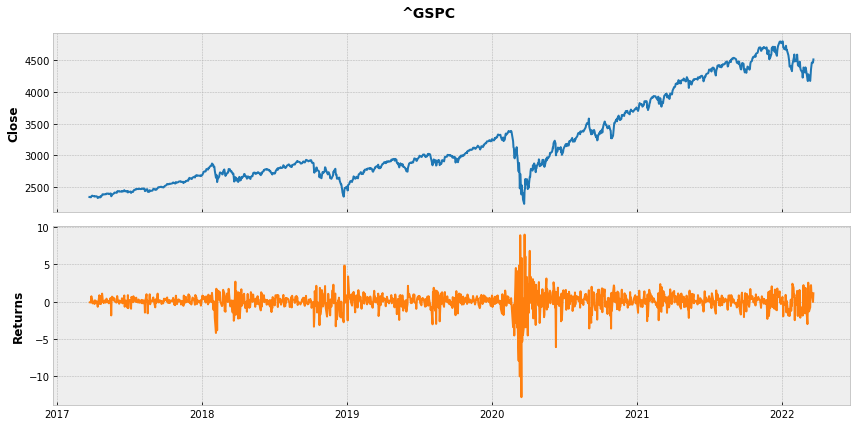

In [4]:
fig, ax = plt.subplots(2,1, figsize=(12,6), sharex=True)

ax[0].plot(data.Close, color='tab:blue')
ax[0].set_ylabel('Close', fontweight='bold')

ax[1].plot(returns, color='tab:orange')
ax[1].set_ylabel('Returns', fontweight='bold')

fig.suptitle(ticker, fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

## GARCH (with a Constant Mean)

In [5]:
# basic GARCH(1,1)

am = arch_model(returns)
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8221.018896023845
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3711687561.3488274
Iteration:      3,   Func. Count:     24,   Neg. LLF: 2012.788085492186
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1590.7449460007633
Iteration:      5,   Func. Count:     37,   Neg. LLF: 12791.070204737054
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1589.8539139106797
Iteration:      7,   Func. Count:     49,   Neg. LLF: 1589.8537455651356
Iteration:      8,   Func. Count:     54,   Neg. LLF: 1589.8537237354171
Iteration:      9,   Func. Count:     58,   Neg. LLF: 1589.8537237354558
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1589.8537237354171
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9


In [6]:
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:            log_returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1589.85
Distribution:                  Normal   AIC:                           3187.71
Method:            Maximum Likelihood   BIC:                           3208.26
                                        No. Observations:                 1258
Date:                Wed, Mar 23 2022   Df Residuals:                     1257
Time:                        09:24:00   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0967  1.958e-02      4.939  7.856e-07 [5.834e-0

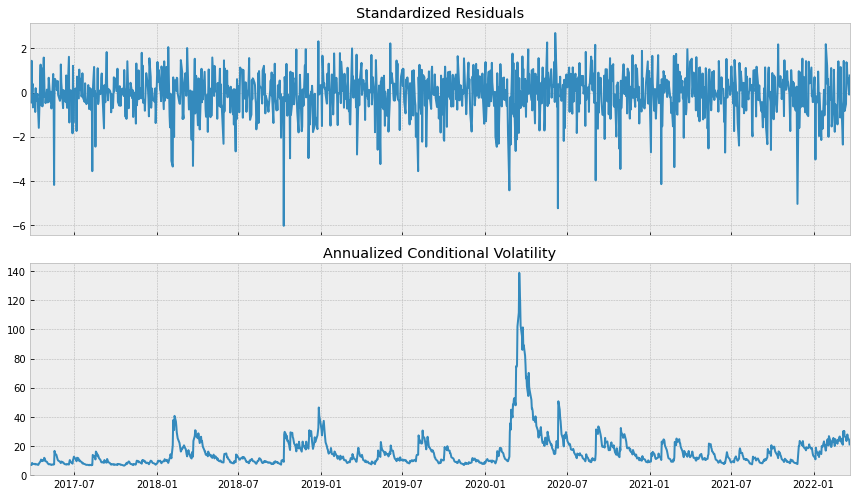

In [7]:
fig = res.plot(annualize='D')
fig.set_size_inches(12,7)
plt.tight_layout()

## GJR-GARCH

In [8]:
# GJR-GARCH --> GARCH(1,1,1)

am = arch_model(returns, p=1, o=1, q=1)
res = am.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 6682.739329942429
Iteration:      2,   Func. Count:     18,   Neg. LLF: 53146844.63023417
Iteration:      3,   Func. Count:     26,   Neg. LLF: 3314.346848210358
Iteration:      4,   Func. Count:     34,   Neg. LLF: 1937.0444841192461
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1575.4524153473212
Iteration:      6,   Func. Count:     49,   Neg. LLF: 1888.3609705417455
Iteration:      7,   Func. Count:     57,   Neg. LLF: 1575.1944473813965
Iteration:      8,   Func. Count:     63,   Neg. LLF: 1575.1944025290902
Iteration:      9,   Func. Count:     68,   Neg. LLF: 1575.194402529285
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1575.1944025290902
            Iterations: 9
            Function evaluations: 68
            Gradient evaluations: 9


In [9]:
print(res.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:            log_returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1575.19
Distribution:                  Normal   AIC:                           3160.39
Method:            Maximum Likelihood   BIC:                           3186.08
                                        No. Observations:                 1258
Date:                Wed, Mar 23 2022   Df Residuals:                     1257
Time:                        09:24:01   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0639  1.801e-02      3.548  3.880e-04 [2.

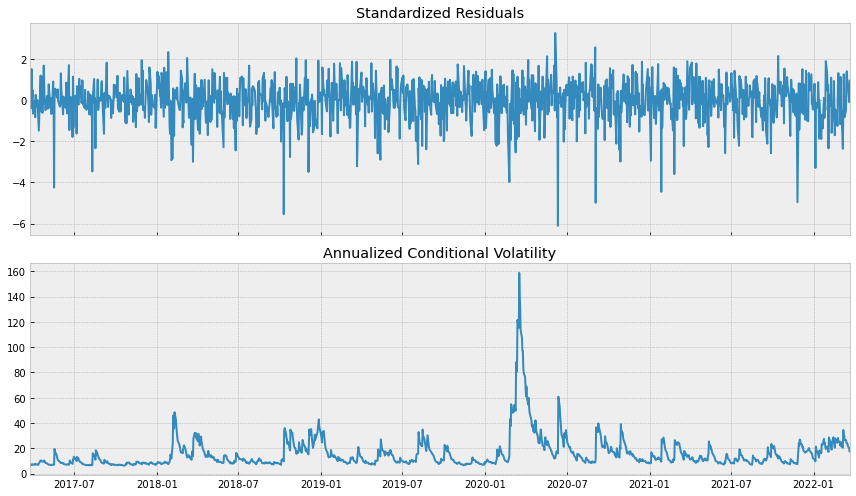

In [10]:
fig = res.plot(annualize='D')
fig.set_size_inches(12,7)
plt.tight_layout()

## TARCH/ZARCH

In [11]:
am = arch_model(returns, p=1, o=1, q=1, power=1)
res = am.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 13323.881617512798
Iteration:      2,   Func. Count:     17,   Neg. LLF: 268748140.6955341
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2642.1998458114476
Iteration:      4,   Func. Count:     33,   Neg. LLF: 1592.1824181519153
Iteration:      5,   Func. Count:     40,   Neg. LLF: 4381.848869273475
Iteration:      6,   Func. Count:     47,   Neg. LLF: 1585.7995711859023
Iteration:      7,   Func. Count:     54,   Neg. LLF: 1563.7916250605492
Iteration:      8,   Func. Count:     60,   Neg. LLF: 1565.1784751806701
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2062.459789899401
Iteration:     10,   Func. Count:     75,   Neg. LLF: 1562.4418536570138
Iteration:     11,   Func. Count:     82,   Neg. LLF: 1562.0707839809254
Iteration:     12,   Func. Count:     88,   Neg. LLF: 1562.0679892859675
Iteration:     13,   Func. Count:     94,   Neg. LLF: 1562.0679829581554
Iteration:     14,   Func. Count:     99,   Neg. LLF: 

In [12]:
print(res.summary())

                  Constant Mean - TARCH/ZARCH Model Results                   
Dep. Variable:            log_returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1562.07
Distribution:                  Normal   AIC:                           3134.14
Method:            Maximum Likelihood   BIC:                           3159.82
                                        No. Observations:                 1258
Date:                Wed, Mar 23 2022   Df Residuals:                     1257
Time:                        09:24:02   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0535  1.800e-02      2.969  2.985e-03 [1.

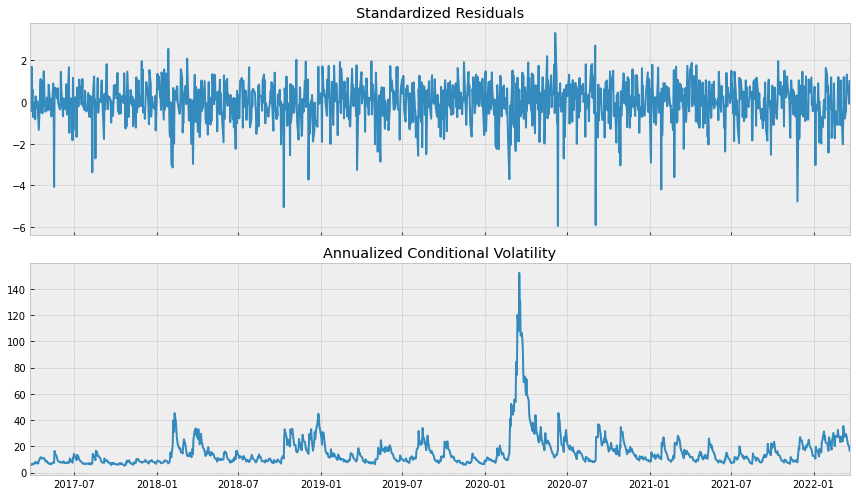

In [13]:
fig = res.plot(annualize='D')
fig.set_size_inches(12,7)
plt.tight_layout()

## Student’s T Errors

In [14]:
am = arch_model(returns, p=1, o=1, q=1, power=1, dist='studentst')
res = am.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 7827.273498010932
Iteration:      2,   Func. Count:     20,   Neg. LLF: 18408.549274753528
Iteration:      3,   Func. Count:     29,   Neg. LLF: 2047.6702110938968
Iteration:      4,   Func. Count:     38,   Neg. LLF: 1512.9607942288756
Iteration:      5,   Func. Count:     45,   Neg. LLF: 2788.066811155062
Iteration:      6,   Func. Count:     53,   Neg. LLF: 2301.3195966387157
Iteration:      7,   Func. Count:     62,   Neg. LLF: 1509.0057247898428
Iteration:      8,   Func. Count:     70,   Neg. LLF: 1506.4956098747793
Iteration:      9,   Func. Count:     77,   Neg. LLF: 1506.3975880928417
Iteration:     10,   Func. Count:     84,   Neg. LLF: 1506.4501866070095
Iteration:     11,   Func. Count:     92,   Neg. LLF: 1506.2900280590818
Iteration:     12,   Func. Count:     99,   Neg. LLF: 1506.2823550693943
Iteration:     13,   Func. Count:    106,   Neg. LLF: 1506.2822978228396
Iteration:     14,   Func. Count:    113,   Neg. LLF:

In [15]:
print(res.summary())

                     Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      TARCH/ZARCH   Log-Likelihood:               -1506.28
Distribution:      Standardized Student's t   AIC:                           3024.56
Method:                  Maximum Likelihood   BIC:                           3055.39
                                              No. Observations:                 1258
Date:                      Wed, Mar 23 2022   Df Residuals:                     1257
Time:                              09:24:02   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu  

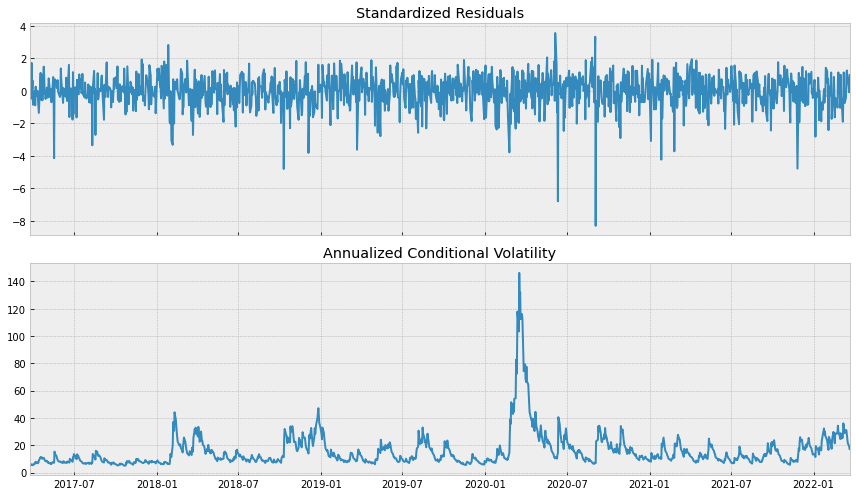

In [16]:
fig = res.plot(annualize='D')
fig.set_size_inches(12,7)
plt.tight_layout()